In [1]:
import pandas as pd

In [2]:
usd_rate = pd.read_excel('/content/RC_F01_12_2017_T01_12_2020.xlsx')

In [3]:
brent_oil = pd.read_excel("/content/RBRTEd.xls", names=['date', 'oil_price'], skiprows=2)

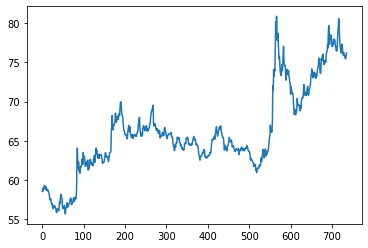

In [4]:
usd_rate.curs.plot()

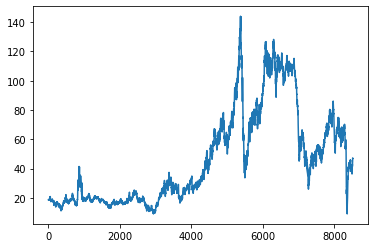

In [5]:
brent_oil.oil_price.plot()

In [6]:
df = usd_rate.set_index('data').join(brent_oil.set_index('date'))

In [7]:
df.drop(['nominal', 'cdx'], inplace=True, axis=1)

In [8]:
df.fillna(method='ffill', inplace=True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df

,data,curs,oil_price
0,2017-12-01,58.5814,64.57
1,2017-12-02,58.5182,64.57
2,2017-12-05,58.9911,63.45
3,2017-12-06,58.6924,62.25
4,2017-12-07,58.9281,62.37
...,...,...,...
731,2020-11-25,75.8146,47.30
732,2020-11-26,75.4727,46.32
733,2020-11-27,75.4518,46.88
734,2020-11-28,75.8599,46.88


In [11]:
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['weekday'] = df['data'].dt.dayofweek

In [12]:
past_days = 7

In [13]:
for day in range(past_days):
  n = day+1
  df[f"day_lag_{n}"] = df['curs'].shift(n)
  df[f"oil_lag_{n}"] = df['oil_price'].shift(n)
  df[f"mult_{n}"] = df[f"day_lag_{n}"] * df[f"oil_lag_{n}"]

In [14]:
df['usd_mean_week'] = df['curs'].shift(1).rolling(window=7).median()
df['oil_mean_week'] = df['oil_price'].shift(1).rolling(window=7).median()

In [15]:
final_df = pd.get_dummies(df, columns=['year', 'month', 'weekday']).drop(['data', 'oil_price'], axis=1)[7:]

In [16]:
final_df.shape

(729, 46)

In [17]:
X = final_df.drop('curs', axis=1) # Данные, на основе которых мы хотим сделать прогноз
y = final_df.curs # То, что мы пытаемся спрогнозировать

In [18]:
# Учебник, то на чем модель учится, "тренировочная выборка"
X_train = X[:700]
y_train = y[:700]

In [19]:
# Экзамен, то на чем мы модель проверяем, "тестовая выборка"
X_test = X[700:]
y_test = y[700:]

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
prediction = LinReg.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error 

In [24]:
print("MAE = ", mean_absolute_error(y_test, prediction))

MAE =  0.4459538557444445


In [25]:
pd.DataFrame(data = LinReg.coef_, index=X.columns, columns=['value']).sort_values(by='value', ascending=False)

,value
day_lag_1,0.858098
oil_lag_2,0.233848
year_2020,0.201550
day_lag_2,0.197473
month_8,0.173780
usd_mean_week,0.166818
oil_lag_7,0.138191
weekday_1,0.119427
month_4,0.105194
weekday_4,0.074346


In [26]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [27]:
ridge_regression = Ridge()
lasso_regression = Lasso()

ridge_regression.fit(X_train, y_train)
lasso_regression.fit(X_train, y_train)

lasso_prediction = lasso_regression.predict(X_test)
ridge_prediction = ridge_regression.predict(X_test)

lasso_mae = mean_absolute_error(y_test, lasso_prediction)
ridge_mae = mean_absolute_error(y_test, ridge_prediction)

print("lasso_mae = ", lasso_mae)
print("ridge_mae = ", ridge_mae)

lasso_mae =  0.5872956570334641
ridge_mae =  0.4485116632255489


In [28]:
pd.DataFrame(data = lasso_regression.coef_, index=X.columns, columns=['value']).sort_values(by='value', ascending=False)

,value
day_lag_1,0.940376
mult_3,0.001041
mult_7,0.000334
month_8,0.000000
year_2020,0.000000
month_1,-0.000000
month_2,-0.000000
month_3,-0.000000
month_4,-0.000000
month_5,0.000000


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_prediction)
print("rf_mae = ", rf_mae)

rf_mae =  0.6830255684729045


In [31]:
import pickle

In [32]:
pickle.dump(rf, open("random_forest.model", "wb")) # пример сохранения Python объектов

In [33]:
pickle.load(open("random_forest.model", "rb")) # пример чтения сохраненного файла Python объекта

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [34]:
from sklearn.neural_network import MLPRegressor

In [35]:
mlp = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=(200, 200, 200, 200))
mlp.fit(X_train, y_train)
mlp_prediction = mlp.predict(X_test)
mlp_mae = mean_absolute_error(y_test, mlp_prediction)
print("mlp_mae = ", mlp_mae)

mlp_mae =  1.474392223549993


In [37]:
from sklearn.model_selection import  GridSearchCV

In [39]:
rfr = RandomForestRegressor(random_state=42, n_jobs=2)

param_grid = {
    "n_estimators": [50, 300, 700, 1200],
    "max_depth": [2, 5, 8],
    "min_samples_split": [1, 2, 4]
}

gs = GridSearchCV(rfr, param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

In [40]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=2,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [41]:
gs.best_score_

-1.7962876892459405

In [42]:
gs.best_params_

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 700}

In [43]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=2, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)